<a href="https://colab.research.google.com/github/JaymeNeto/cluster-de-alugueis/blob/master/analise_e_clusterizacao_de_alugueis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nesse Notebook eu faço uma exploração dos dados de um dataset de valores de aluguel de imoveis.

Fazendo uma analise vou tentar devendar:

* Quais parametros mais influenciam no preço do aluguel.


In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, MeanShift, AffinityPropagation, AgglomerativeClustering
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
rent = pd.read_csv('houses_to_rent_v2.csv')
rent['furniture'] = pd.get_dummies(rent.furniture)['furnished']
rent['animal'] = pd.get_dummies(rent.animal)['acept']

rent.columns = ['Cidade','Area', 'Quartos', 'Banheiros', 'Vagas', 'Andar', 'Permite Animal', 'Mobiliado', 'Condominio', 'Aluguel', 'IPTU', 'Seguro', 'Total']

In [35]:
rent['Tx. IPTU'] = 100*rent['IPTU']/rent['Aluguel']
rent['Tx. Seguro'] = 100*rent['Seguro']/rent['Aluguel']
rent

Cidade  Area  Quartos  ...  Total   Tx. IPTU Tx. Seguro
0           São Paulo    70        2  ...   5618   6.393939   1.272727
1           São Paulo   320        4  ...   7973  35.282258   1.270161
2        Porto Alegre    80        1  ...   3841   0.000000   1.464286
3        Porto Alegre    51        2  ...   1421   1.978417   1.528777
4           São Paulo    25        1  ...    836   3.125000   1.375000
...               ...   ...      ...  ...    ...        ...        ...
10687    Porto Alegre    63        2  ...   1926   1.623816   1.488498
10688       São Paulo   285        4  ...  19260   6.486667   1.273333
10689  Rio de Janeiro    70        3  ...   7390   5.533333   1.300000
10690  Rio de Janeiro   120        2  ...  14020   2.325000   1.291667
10691       São Paulo    80        2  ...   1587  11.785714   1.571429

[10692 rows x 15 columns]

In [36]:
print('Apresentação da tabela: ')
print(rent.head(3))
print('Tipo dos dados: ')
rent.info()

Apresentação da tabela: 
         Cidade  Area  Quartos  Banheiros  ...  Seguro Total   Tx. IPTU  Tx. Seguro
0     São Paulo    70        2          1  ...      42  5618   6.393939    1.272727
1     São Paulo   320        4          4  ...      63  7973  35.282258    1.270161
2  Porto Alegre    80        1          1  ...      41  3841   0.000000    1.464286

[3 rows x 15 columns]
Tipo dos dados: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cidade          10692 non-null  object 
 1   Area            10692 non-null  int64  
 2   Quartos         10692 non-null  int64  
 3   Banheiros       10692 non-null  int64  
 4   Vagas           10692 non-null  int64  
 5   Andar           10692 non-null  object 
 6   Permite Animal  10692 non-null  uint8  
 7   Mobiliado       10692 non-null  uint8  
 8   Condominio      10692 non-null  int

In [37]:
def muda_tipo(s):
    try:
        return int(s)
    except:
        return 0
rent.Andar = rent.Andar.map(muda_tipo)

<Figure size 1152x864 with 0 Axes>

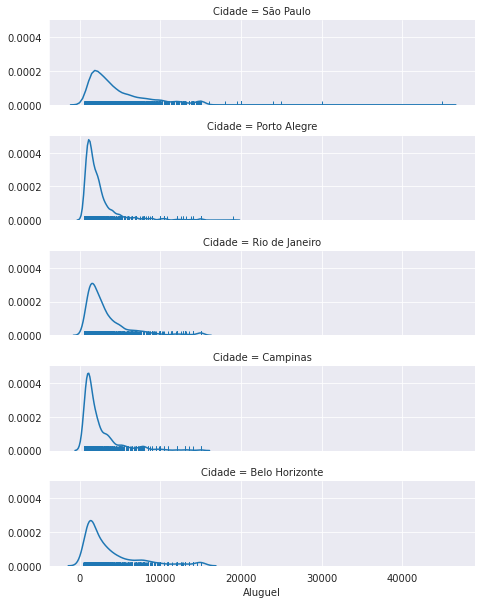

In [40]:
plt.figure(figsize=(16, 12))
g = sns.FacetGrid(rent, row="Cidade", height=1.7, aspect=4,)
g.map(sns.distplot, "Aluguel", hist=False, rug=True)

<Figure size 1152x864 with 0 Axes>

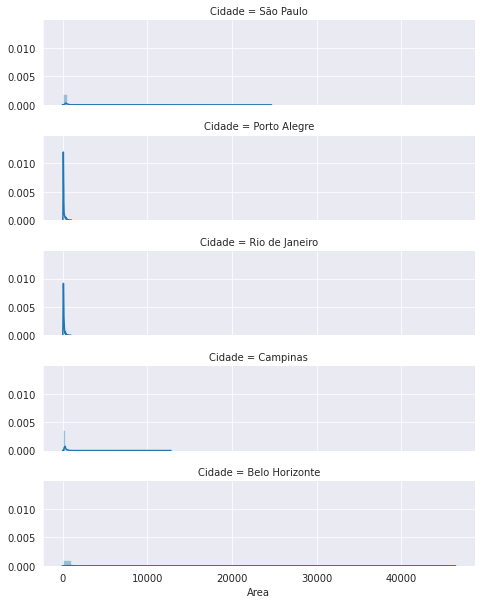

In [32]:
plt.figure(figsize=(16, 12))
g = sns.FacetGrid(rent, row="Cidade", height=1.7, aspect=4,)
g.map(sns.distplot, "Area")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1152x864 with 0 Axes>

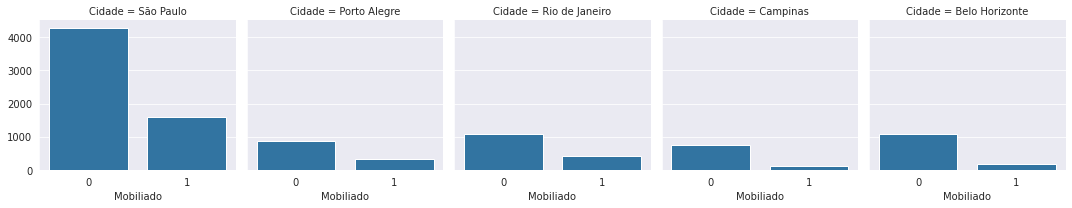

In [19]:
plt.figure(figsize=(16, 12))
g = sns.FacetGrid(rent, col="Cidade")
g.map(sns.countplot, "Mobiliado")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1152x864 with 0 Axes>

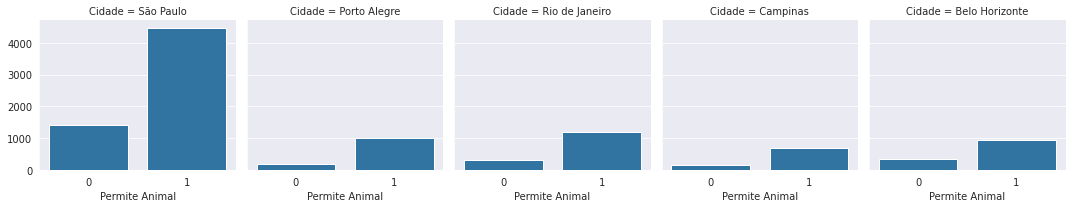

In [24]:
plt.figure(figsize=(16, 12))
g = sns.FacetGrid(rent, col="Cidade")
g.map(sns.countplot, "Permite Animal")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1152x864 with 0 Axes>

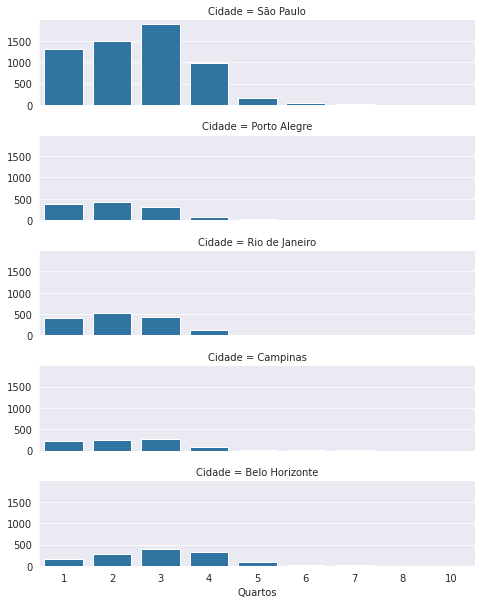

In [27]:
plt.figure(figsize=(16, 12))
g = sns.FacetGrid(rent, row="Cidade", height=1.7, aspect=4,)
g.map(sns.countplot, "Quartos")

In [ ]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cidade          10692 non-null  object 
 1   Area            10692 non-null  int64  
 2   Quartos         10692 non-null  int64  
 3   Banheiros       10692 non-null  int64  
 4   Vagas           10692 non-null  int64  
 5   Andar           10692 non-null  object 
 6   Permite Animal  10692 non-null  uint8  
 7   Mobiliado       10692 non-null  uint8  
 8   Condominio      10692 non-null  int64  
 9   Aluguel         10692 non-null  int64  
 10  IPTU            10692 non-null  int64  
 11  Seguro          10692 non-null  int64  
 12  Total           10692 non-null  int64  
 13  Tx. IPTU        10692 non-null  float64
 14  Tx. Seguro      10692 non-null  float64
dtypes: float64(2), int64(9), object(2), uint8(2)
memory usage: 1.1+ MB


In [ ]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cidade          10692 non-null  object 
 1   Area            10692 non-null  int64  
 2   Quartos         10692 non-null  int64  
 3   Banheiros       10692 non-null  int64  
 4   Vagas           10692 non-null  int64  
 5   Andar           10692 non-null  int64  
 6   Permite Animal  10692 non-null  uint8  
 7   Mobiliado       10692 non-null  uint8  
 8   Condominio      10692 non-null  int64  
 9   Aluguel         10692 non-null  int64  
 10  IPTU            10692 non-null  int64  
 11  Seguro          10692 non-null  int64  
 12  Total           10692 non-null  int64  
 13  Tx. IPTU        10692 non-null  float64
 14  Tx. Seguro      10692 non-null  float64
dtypes: float64(2), int64(10), object(1), uint8(2)
memory usage: 1.1+ MB


In [ ]:
rent.describe()

Area       Quartos  ...      Tx. IPTU    Tx. Seguro
count  10692.000000  10692.000000  ...  10692.000000  10692.000000
mean     149.217920      2.506079  ...      8.648820      1.366721
std      537.016942      1.171266  ...    122.152895      0.151004
min       11.000000      1.000000  ...      0.000000      0.269703
25%       56.000000      2.000000  ...      2.142857      1.282889
50%       90.000000      2.000000  ...      5.212500      1.313131
75%      182.000000      3.000000  ...      9.175986      1.500000
max    46335.000000     13.000000  ...  12548.000000      1.875000

[8 rows x 14 columns]

In [ ]:
rent[rent['Tx. IPTU'] == 12548.000000]

Cidade  Area  Quartos  Banheiros  ...  Seguro   Total  Tx. IPTU  Tx. Seguro
6645  São Paulo    42        1          2  ...      32  316900   12548.0        1.28

[1 rows x 15 columns]

# Lidando com outliers

In [ ]:
def remove_outliers(data, label):
    #calculate the IQR
    IQR = data[label].quantile(0.75) - data[label].quantile(0.25)
    
    #calculate the boundries
    lower = data[label].quantile(0.25) - (IQR * 1.5)
    upper = data[label].quantile(0.75) + (IQR * 1.5)
    
    # find the outliers
    outliers = np.where(data[label] > upper, True, np.where(data[label] < lower, True, False))
    
    # remove outliers from data.
    return data.loc[~outliers] 

In [ ]:
for label in ['Area', 'Aluguel', 'Quartos', 'Andar', 'IPTU','Condominio']:
    rent = remove_outliers(rent, label)

In [ ]:
rent.describe()

Area      Quartos  ...     Tx. IPTU   Tx. Seguro
count  7924.000000  7924.000000  ...  7924.000000  7924.000000
mean     92.129606     2.166078  ...     4.972967     1.369614
std      63.128317     0.965350  ...     4.750122     0.153305
min      11.000000     1.000000  ...     0.000000     0.311284
25%      50.000000     1.000000  ...     1.428571     1.289474
50%      72.000000     2.000000  ...     4.206258     1.327963
75%     112.000000     3.000000  ...     7.222222     1.489362
max     367.000000     6.000000  ...    62.500000     1.875000

[8 rows x 14 columns]

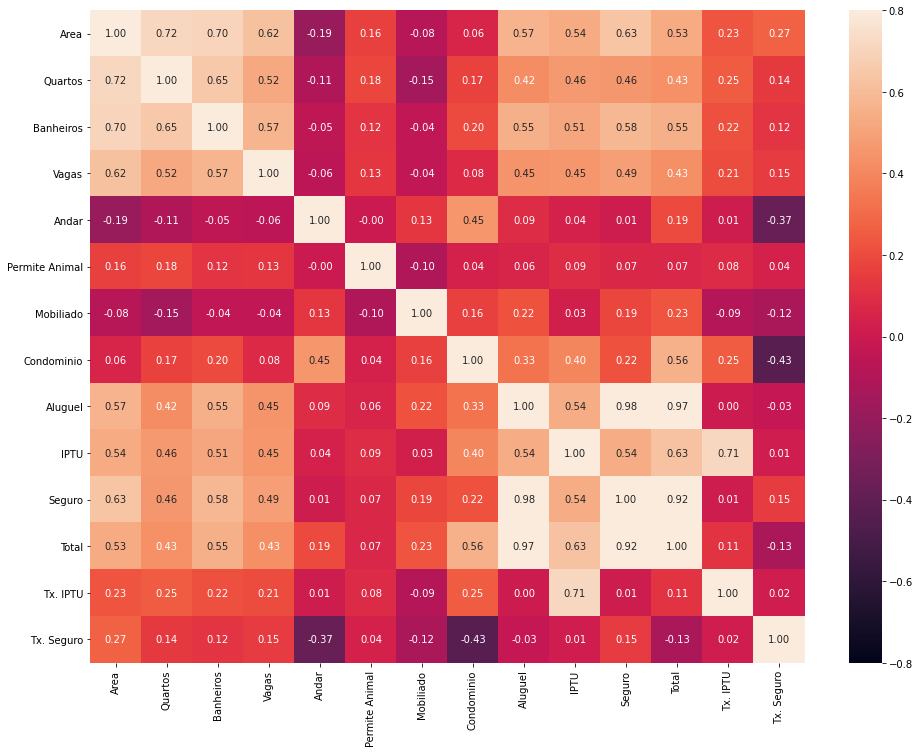

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16, 12))
sns.heatmap(rent.corr(), annot=True, fmt='.2f', vmax=0.8, vmin=-0.8)
plt.show()

# Analise da relação do aluguel com outros valores pagos.

Quero analisar a relação do valor do aluguel com outros valores pagos, ou seja a taxa de consominio, o IPTU e o seguro contra incendio


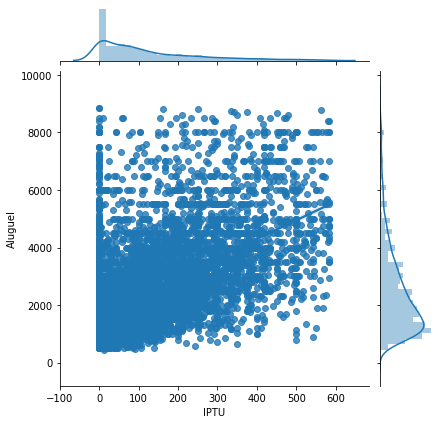

In [ ]:
sns.jointplot(y= rent['Aluguel'],x = rent['IPTU'],kind ='reg')

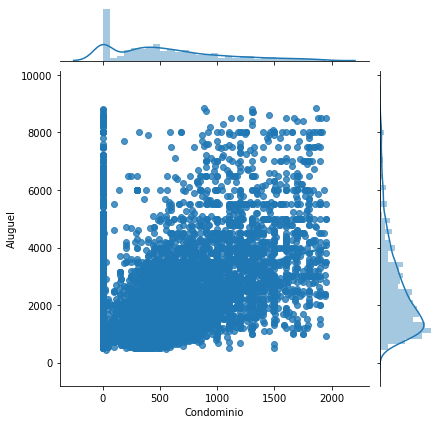

In [ ]:
sns.jointplot(y= rent['Aluguel'],x = rent['Condominio'],kind ='reg')

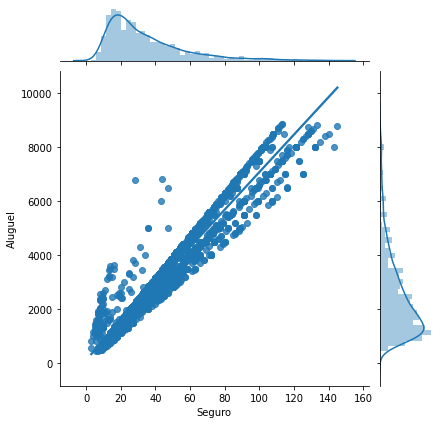

In [ ]:
sns.jointplot(y= rent['Aluguel'],x = rent['Seguro'],kind ='reg')

## Conclusão

Nos gráficos acima não consegui ver uma relação direta entre IPTU e condominio, mas o seguro contra incendio mostrou grande correlação. Isso pode ser devido ao fato que o preço possa estar mais relacionado com o valor do apartamento.

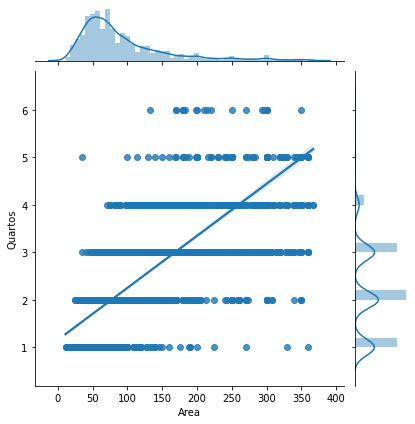

In [ ]:
sns.jointplot(y= rent['Quartos'],x = rent['Area'],kind ='reg')

# Relacionando com valores discretos

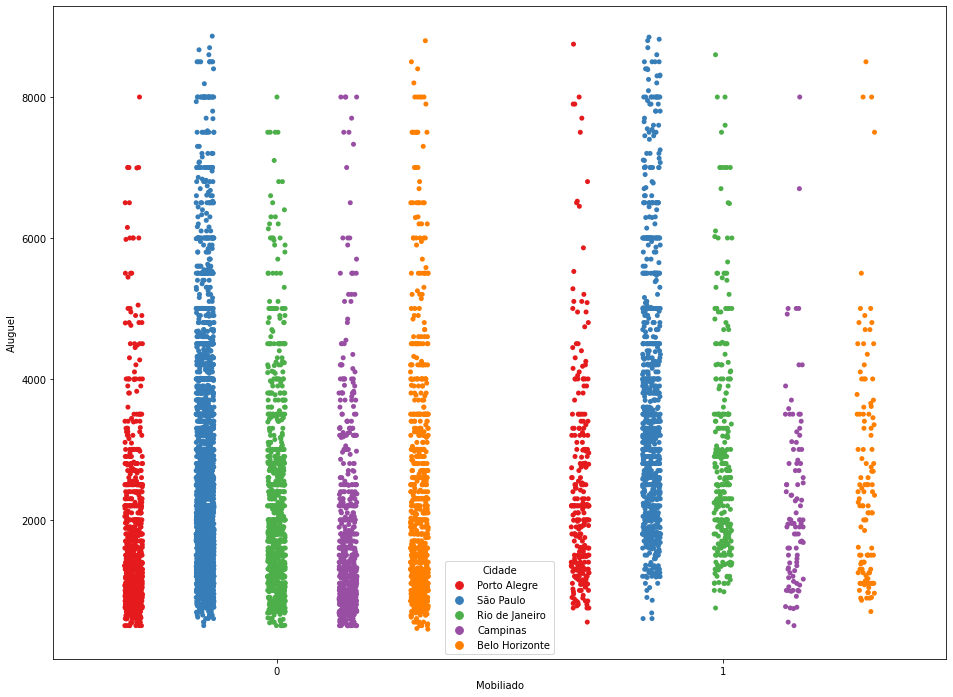

In [ ]:
plt.figure(figsize=(16, 12))
sns.stripplot(x="Mobiliado", y="Aluguel", hue= "Cidade", data=rent, palette="Set1", dodge=True)
plt.show()

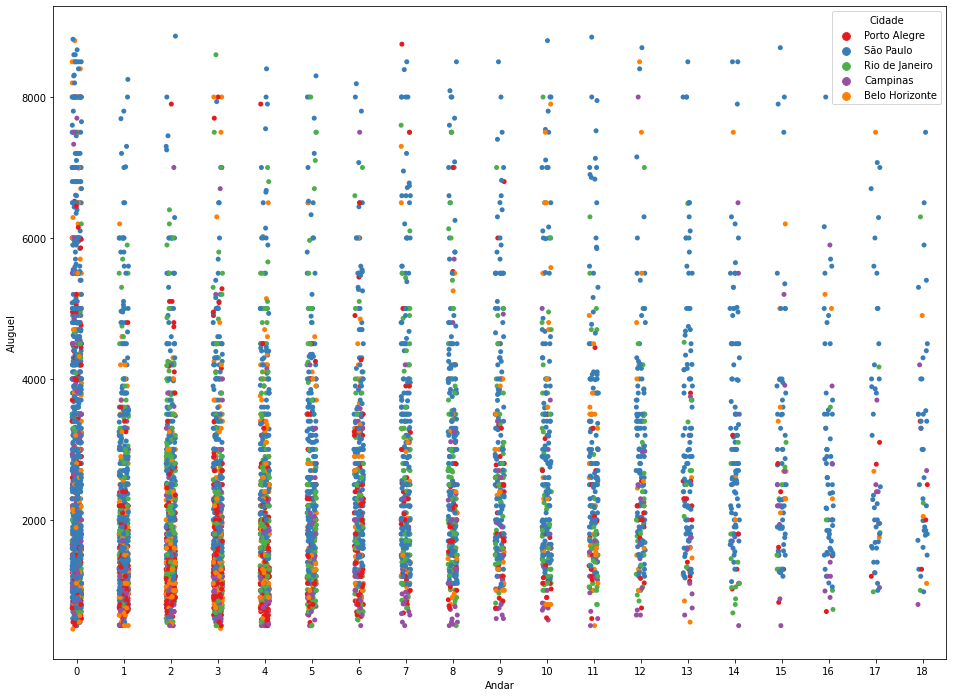

In [ ]:
plt.figure(figsize=(16, 12))
sns.stripplot(x="Andar", y="Aluguel", hue= "Cidade", data=rent, palette="Set1")
plt.show()

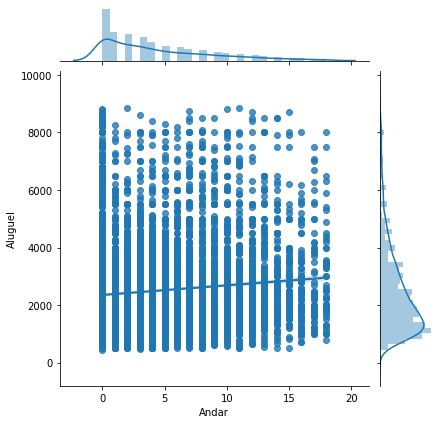

In [ ]:
sns.jointplot(y= rent['Aluguel'],x = rent['Andar'],kind ='reg')

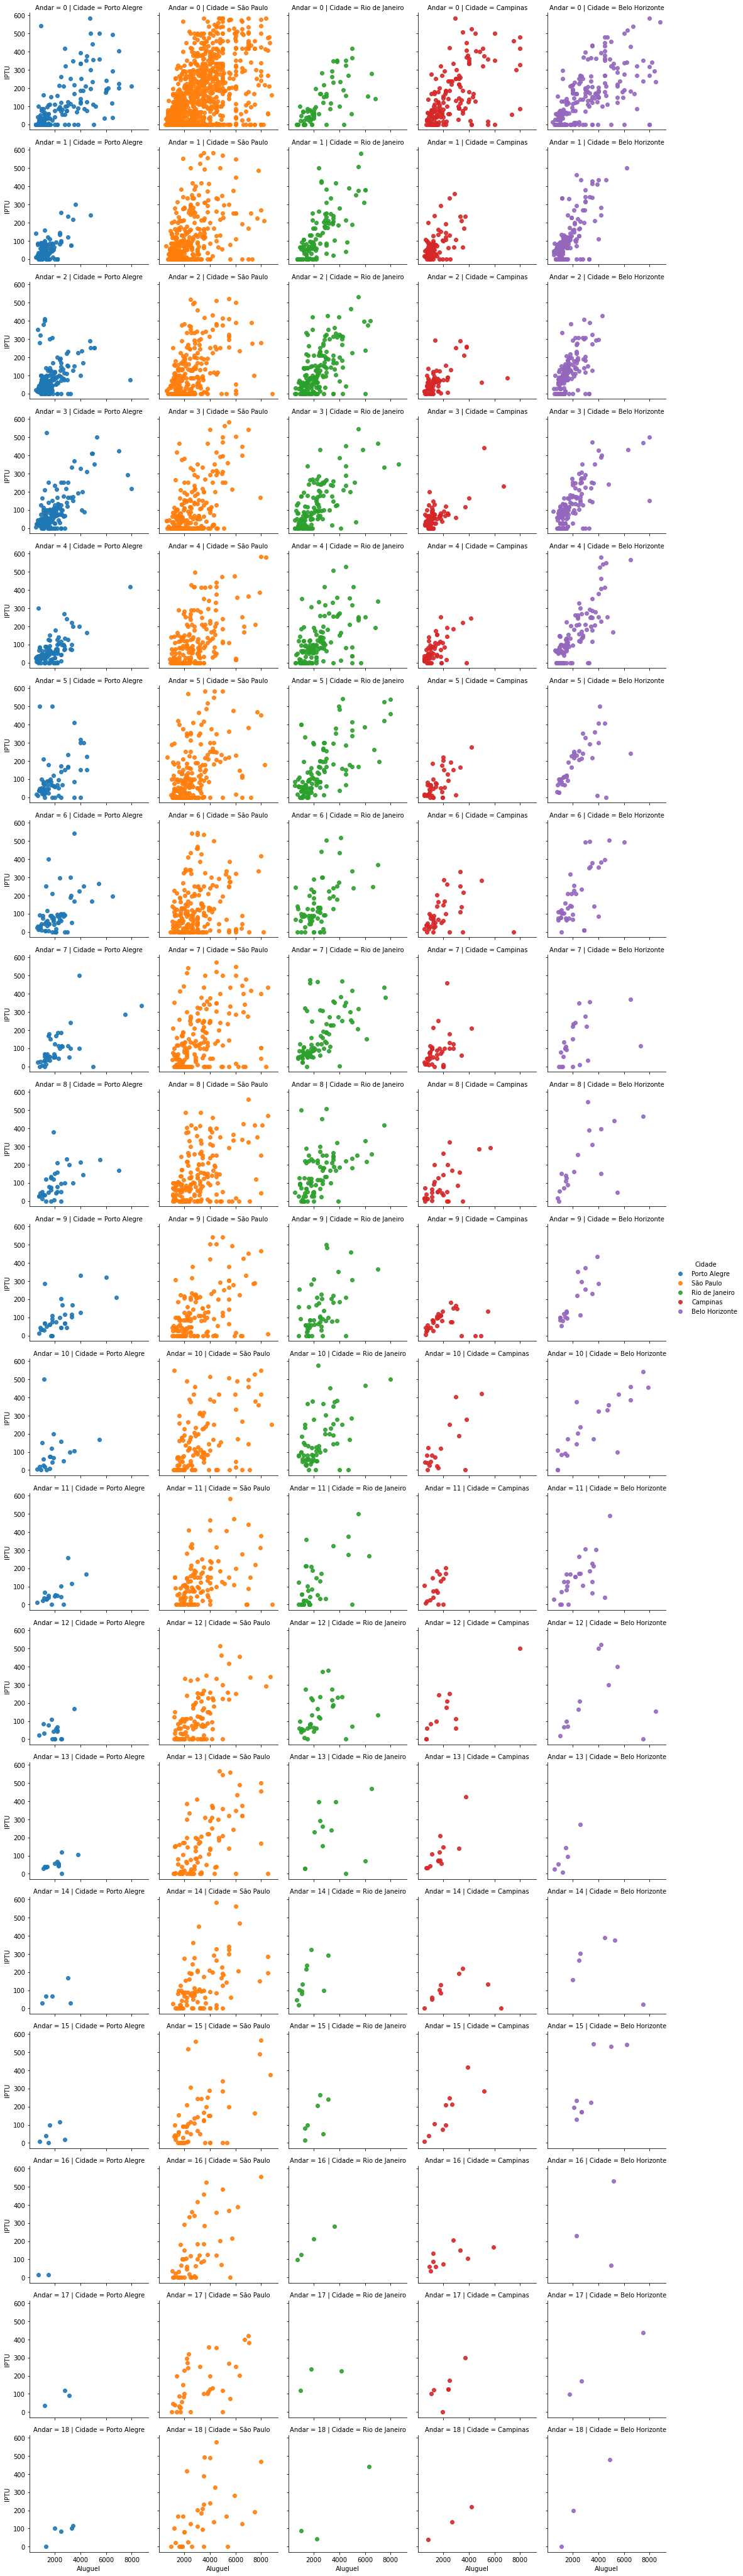

In [ ]:
g = sns.FacetGrid(rent, col="Cidade", row="Andar", hue="Cidade")
g.map(plt.scatter, "Aluguel", "IPTU", alpha=.9)
g.add_legend()
plt.show()

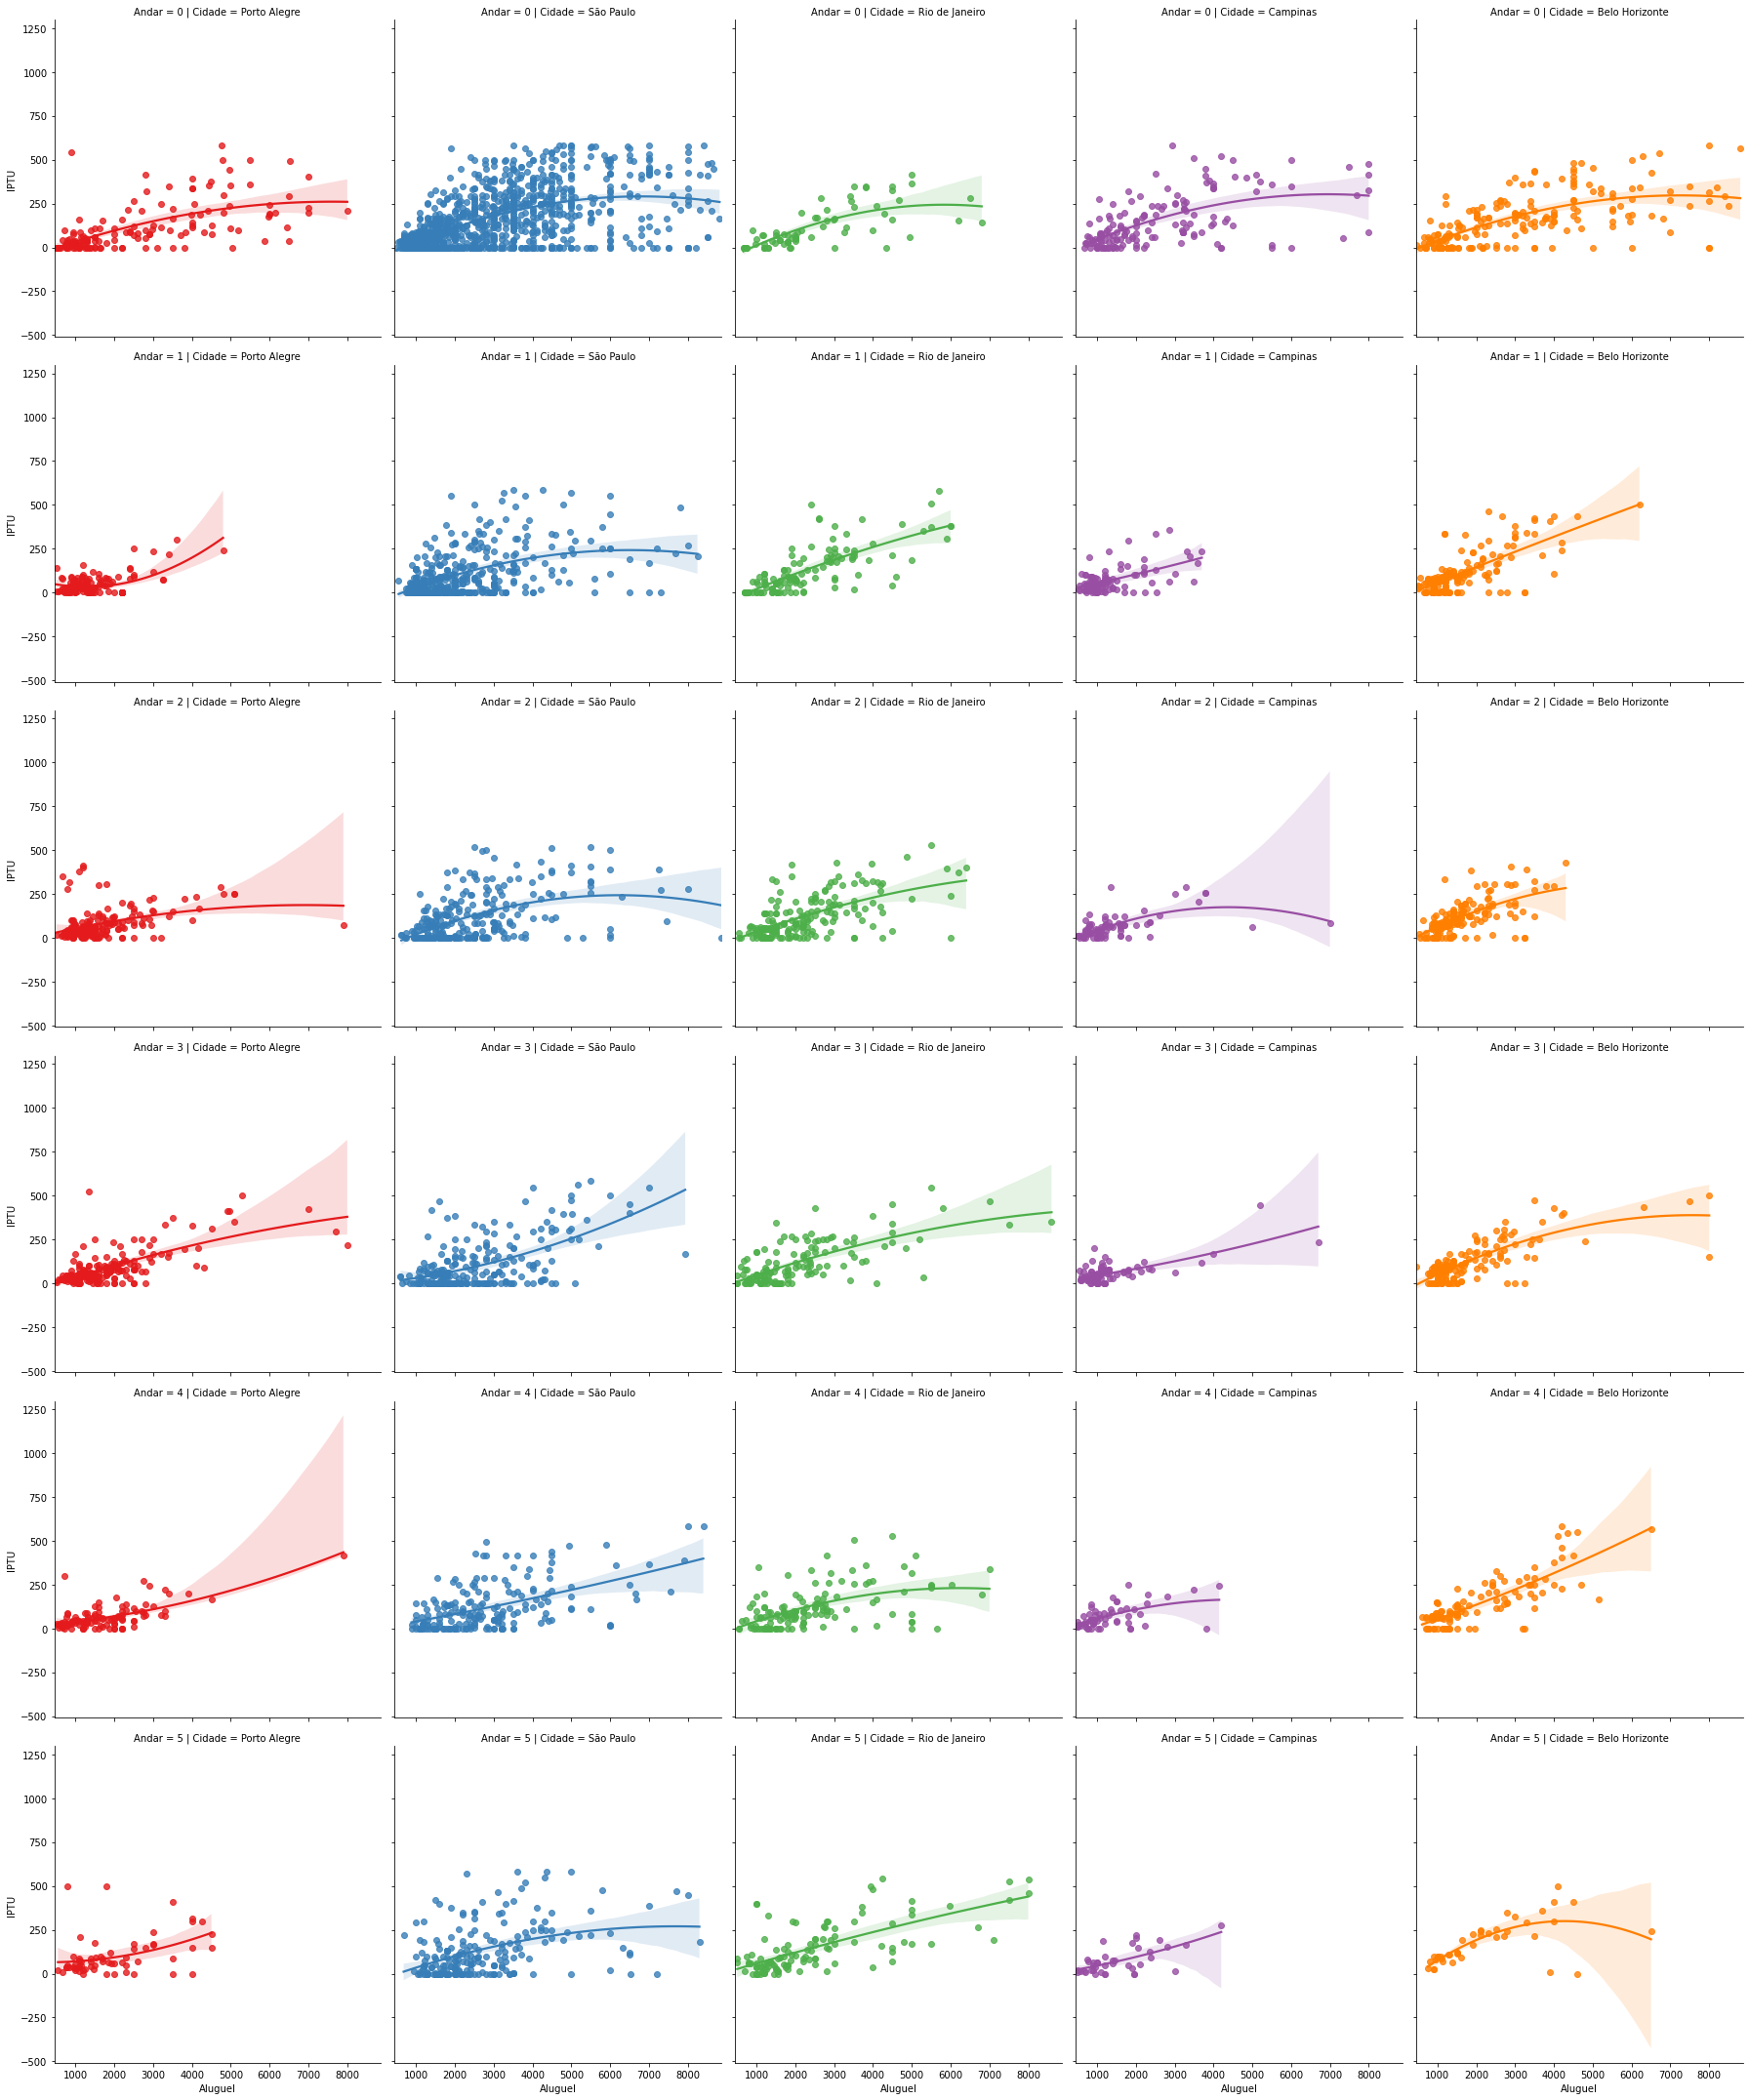

In [ ]:
sns.lmplot(x="Aluguel", y="IPTU", hue="Cidade", col="Cidade",row="Andar",order=2,palette="Set1",data=rent[rent.Andar<6])
plt.show()

In [ ]:
#rent.drop(columns=['Cidade', 'Permite Animal', 'Mobiliado', 'IPTU','Total','Seguro'], inplace=True, errors='ignore')
#rent.dropna(inplace=True)

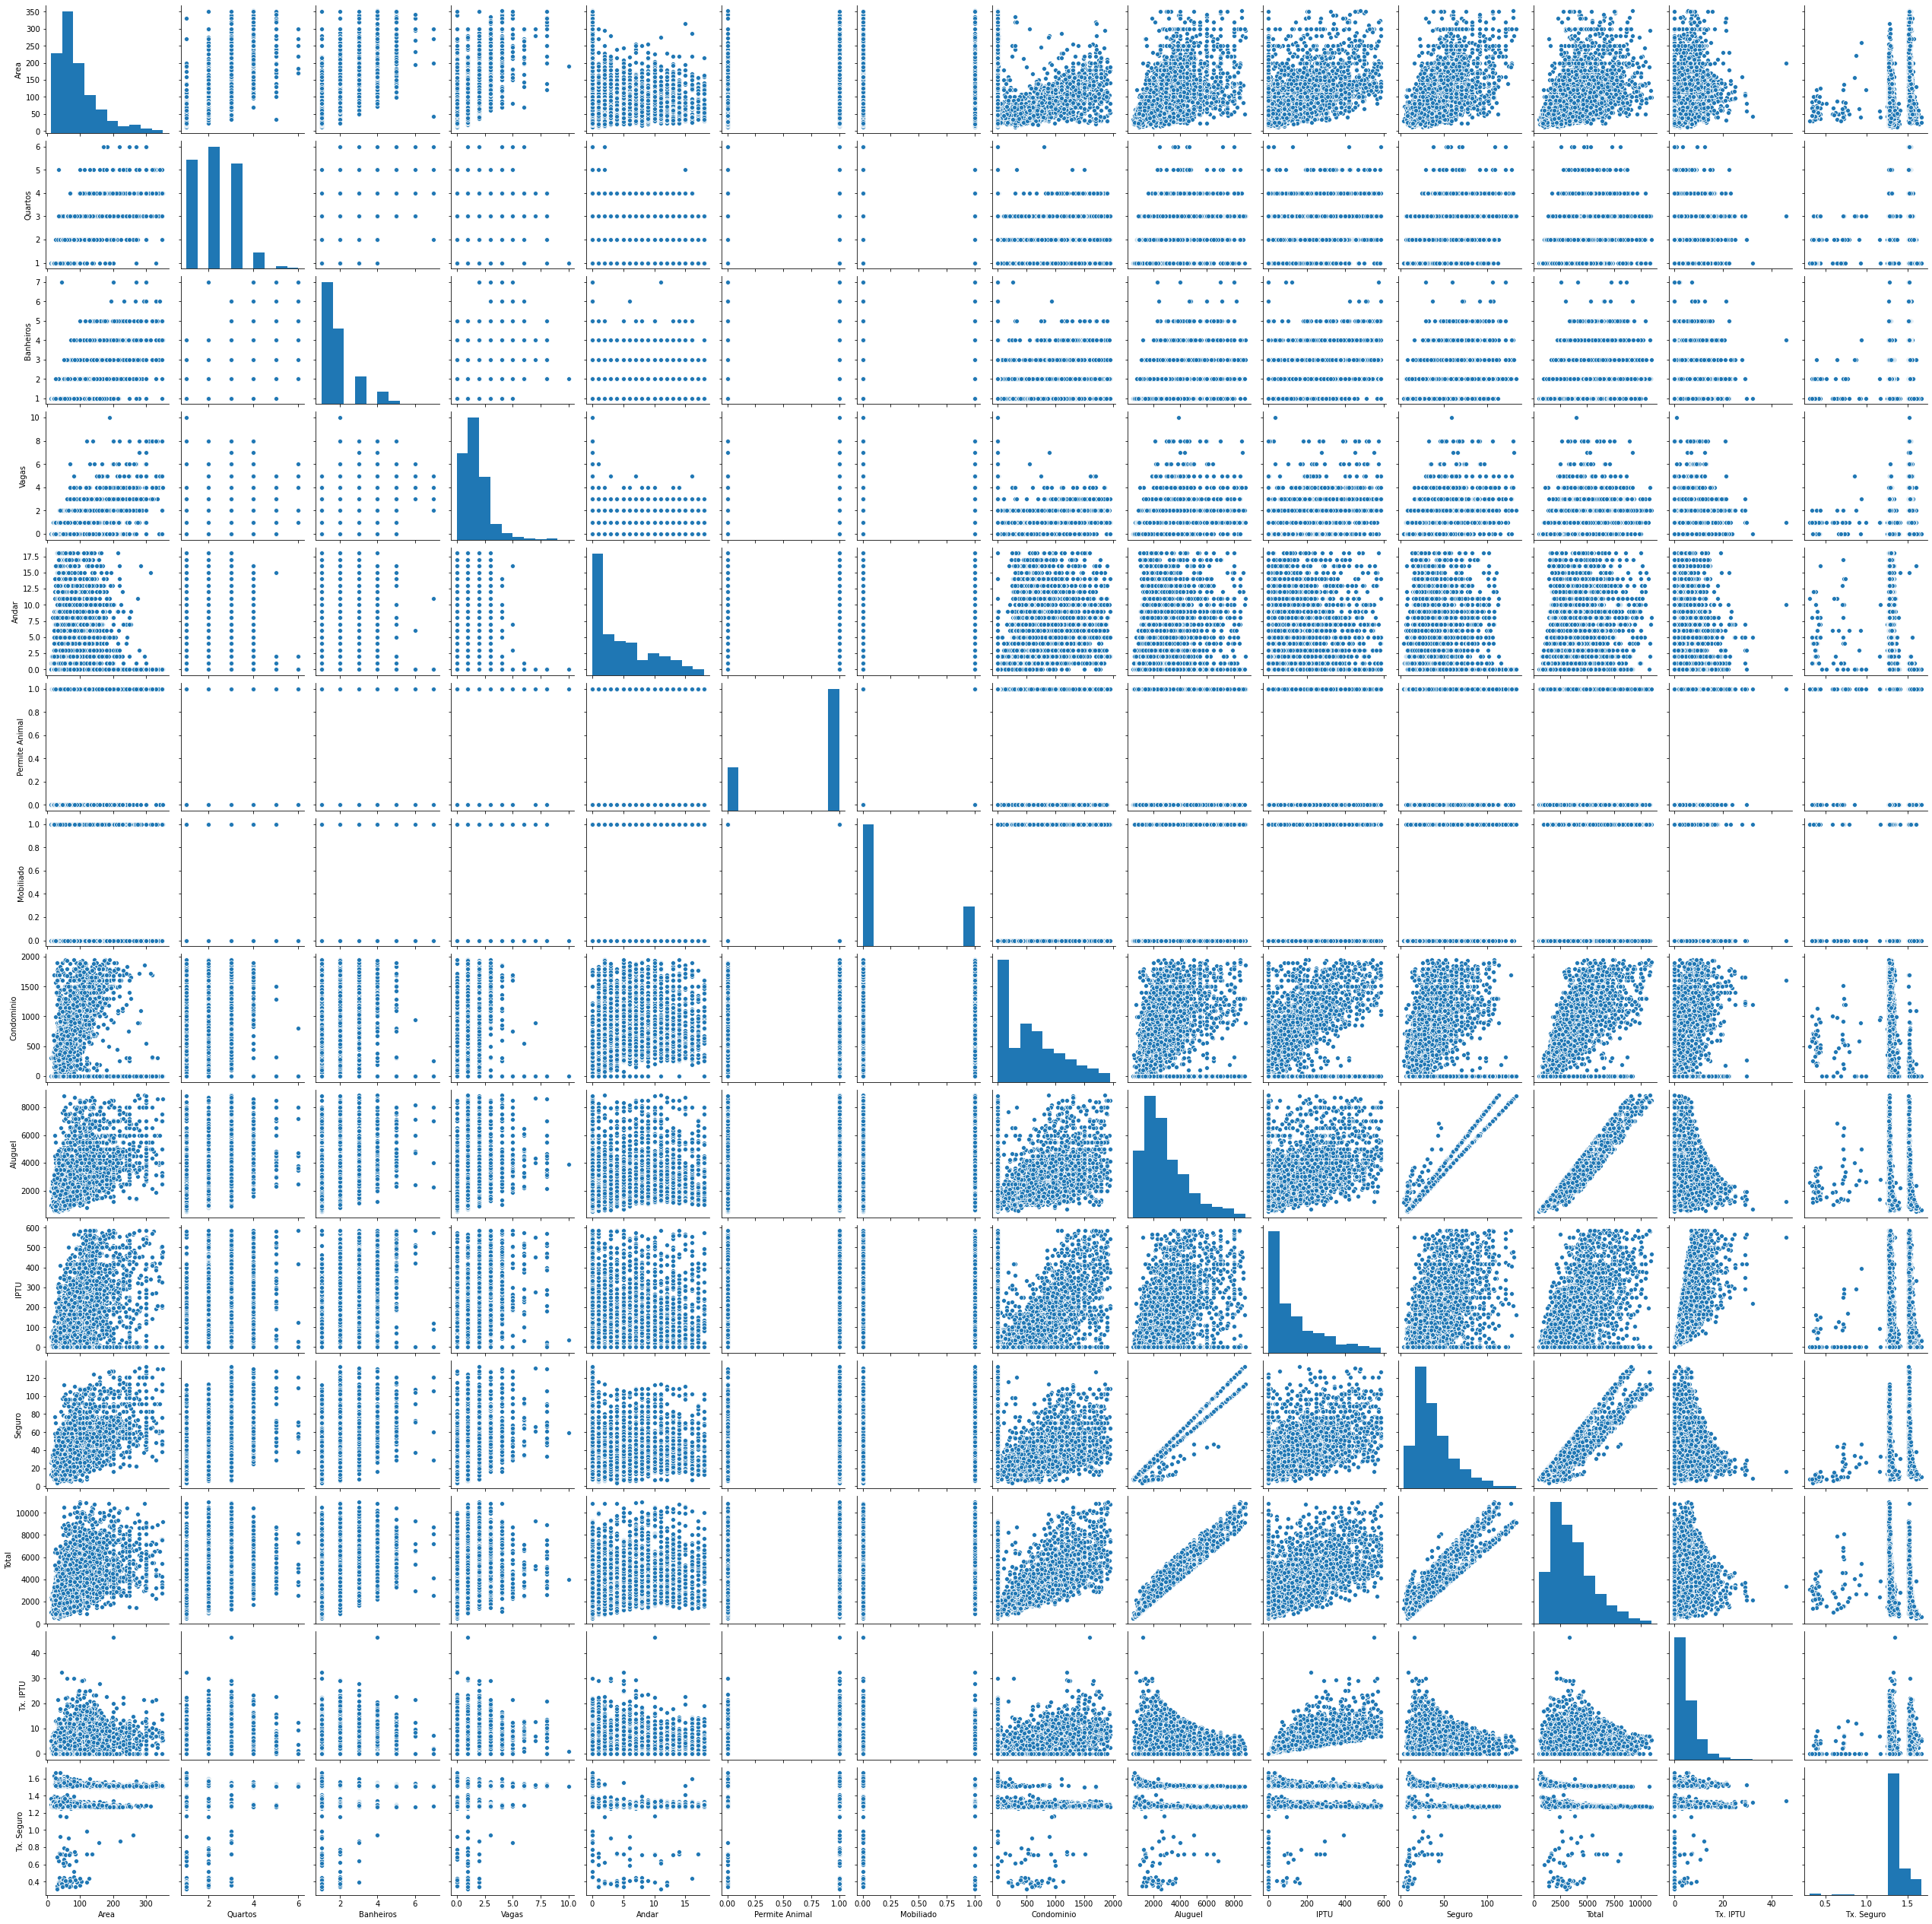

In [ ]:
sns.pairplot(rent[rent.Cidade == "São Paulo"]) 
plt.show()

In [ ]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski, labels

In [ ]:
s, dbs, calinski, labels = clustering_algorithm(3, rent[rent.columns[1:]])
print('Silhoutte: ', s, 'Davies-Bouldin: ', dbs, 'Calinski-Harabasz: ', calinski)

Silhoutte:  0.5334011165229944 Davies-Bouldin:  0.6440494404316884 Calinski-Harabasz:  16619.19170111162


In [ ]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 2662, 1: 826, 2: 4436}

In [ ]:
s2, dbs2, calinski2, labels2 = clustering_algorithm(5, rent[rent.columns[1:]])
print('Silhoutte: ', s2, 'Davies-Bouldin: ', dbs2, 'Calinski-Harabasz: ', calinski2)

Silhoutte:  0.47284112000430584 Davies-Bouldin:  0.7132547716472377 Calinski-Harabasz:  17570.14617478103


In [ ]:
unique, counts = np.unique(labels2, return_counts=True)
dict(zip(unique, counts))

{0: 2795, 1: 867, 2: 384, 3: 2292, 4: 1586}

In [ ]:
s3, dbs3, calinski3, labels3 = clustering_algorithm(7, rent[rent.columns[1:]])
print('Silhoutte: ', s3, 'Davies-Bouldin: ', dbs3, 'Calinski-Harabasz: ', calinski3)

Silhoutte:  0.372942623881544 Davies-Bouldin:  0.8759696087756962 Calinski-Harabasz:  16617.658983526206


In [ ]:
unique, counts = np.unique(labels3, return_counts=True)
dict(zip(unique, counts))

{0: 193, 1: 1527, 2: 1925, 3: 403, 4: 751, 5: 1200, 6: 1925}

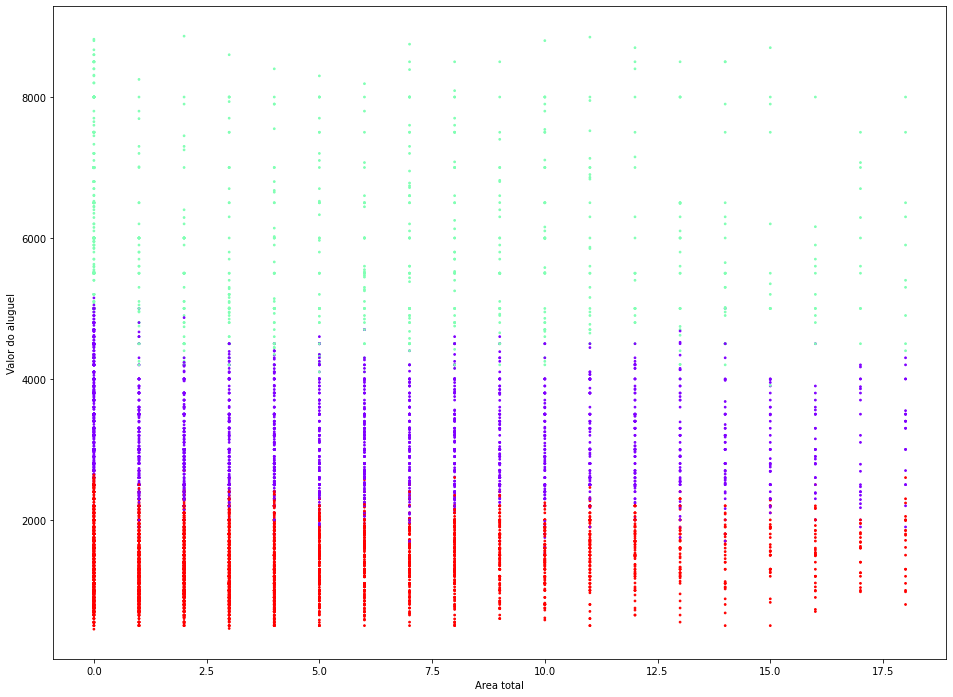

In [ ]:
plt.figure(figsize=(16, 12))
plt.scatter(rent['Andar'], rent['Aluguel'], c=labels, s=3, cmap='rainbow')
plt.xlabel("Area total")
plt.ylabel("Valor do aluguel")
plt.show()

In [ ]:
rent['Cluster'] = labels
rent

Cidade  Area  Quartos  ...   Tx. IPTU  Tx. Seguro  Cluster
2        Porto Alegre    80        1  ...   0.000000    1.464286        0
3        Porto Alegre    51        2  ...   1.978417    1.528777        2
4           São Paulo    25        1  ...   3.125000    1.375000        2
6      Rio de Janeiro    72        2  ...   4.473684    1.315789        2
9      Rio de Janeiro    35        1  ...   1.521739    1.304348        2
...               ...   ...      ...  ...        ...         ...      ...
10684  Rio de Janeiro    98        2  ...   4.717949    1.307692        0
10685       São Paulo    83        3  ...   2.938439    1.276426        1
10687    Porto Alegre    63        2  ...   1.623816    1.488498        2
10689  Rio de Janeiro    70        3  ...   5.533333    1.300000        1
10691       São Paulo    80        2  ...  11.785714    1.571429        2

[7924 rows x 16 columns]

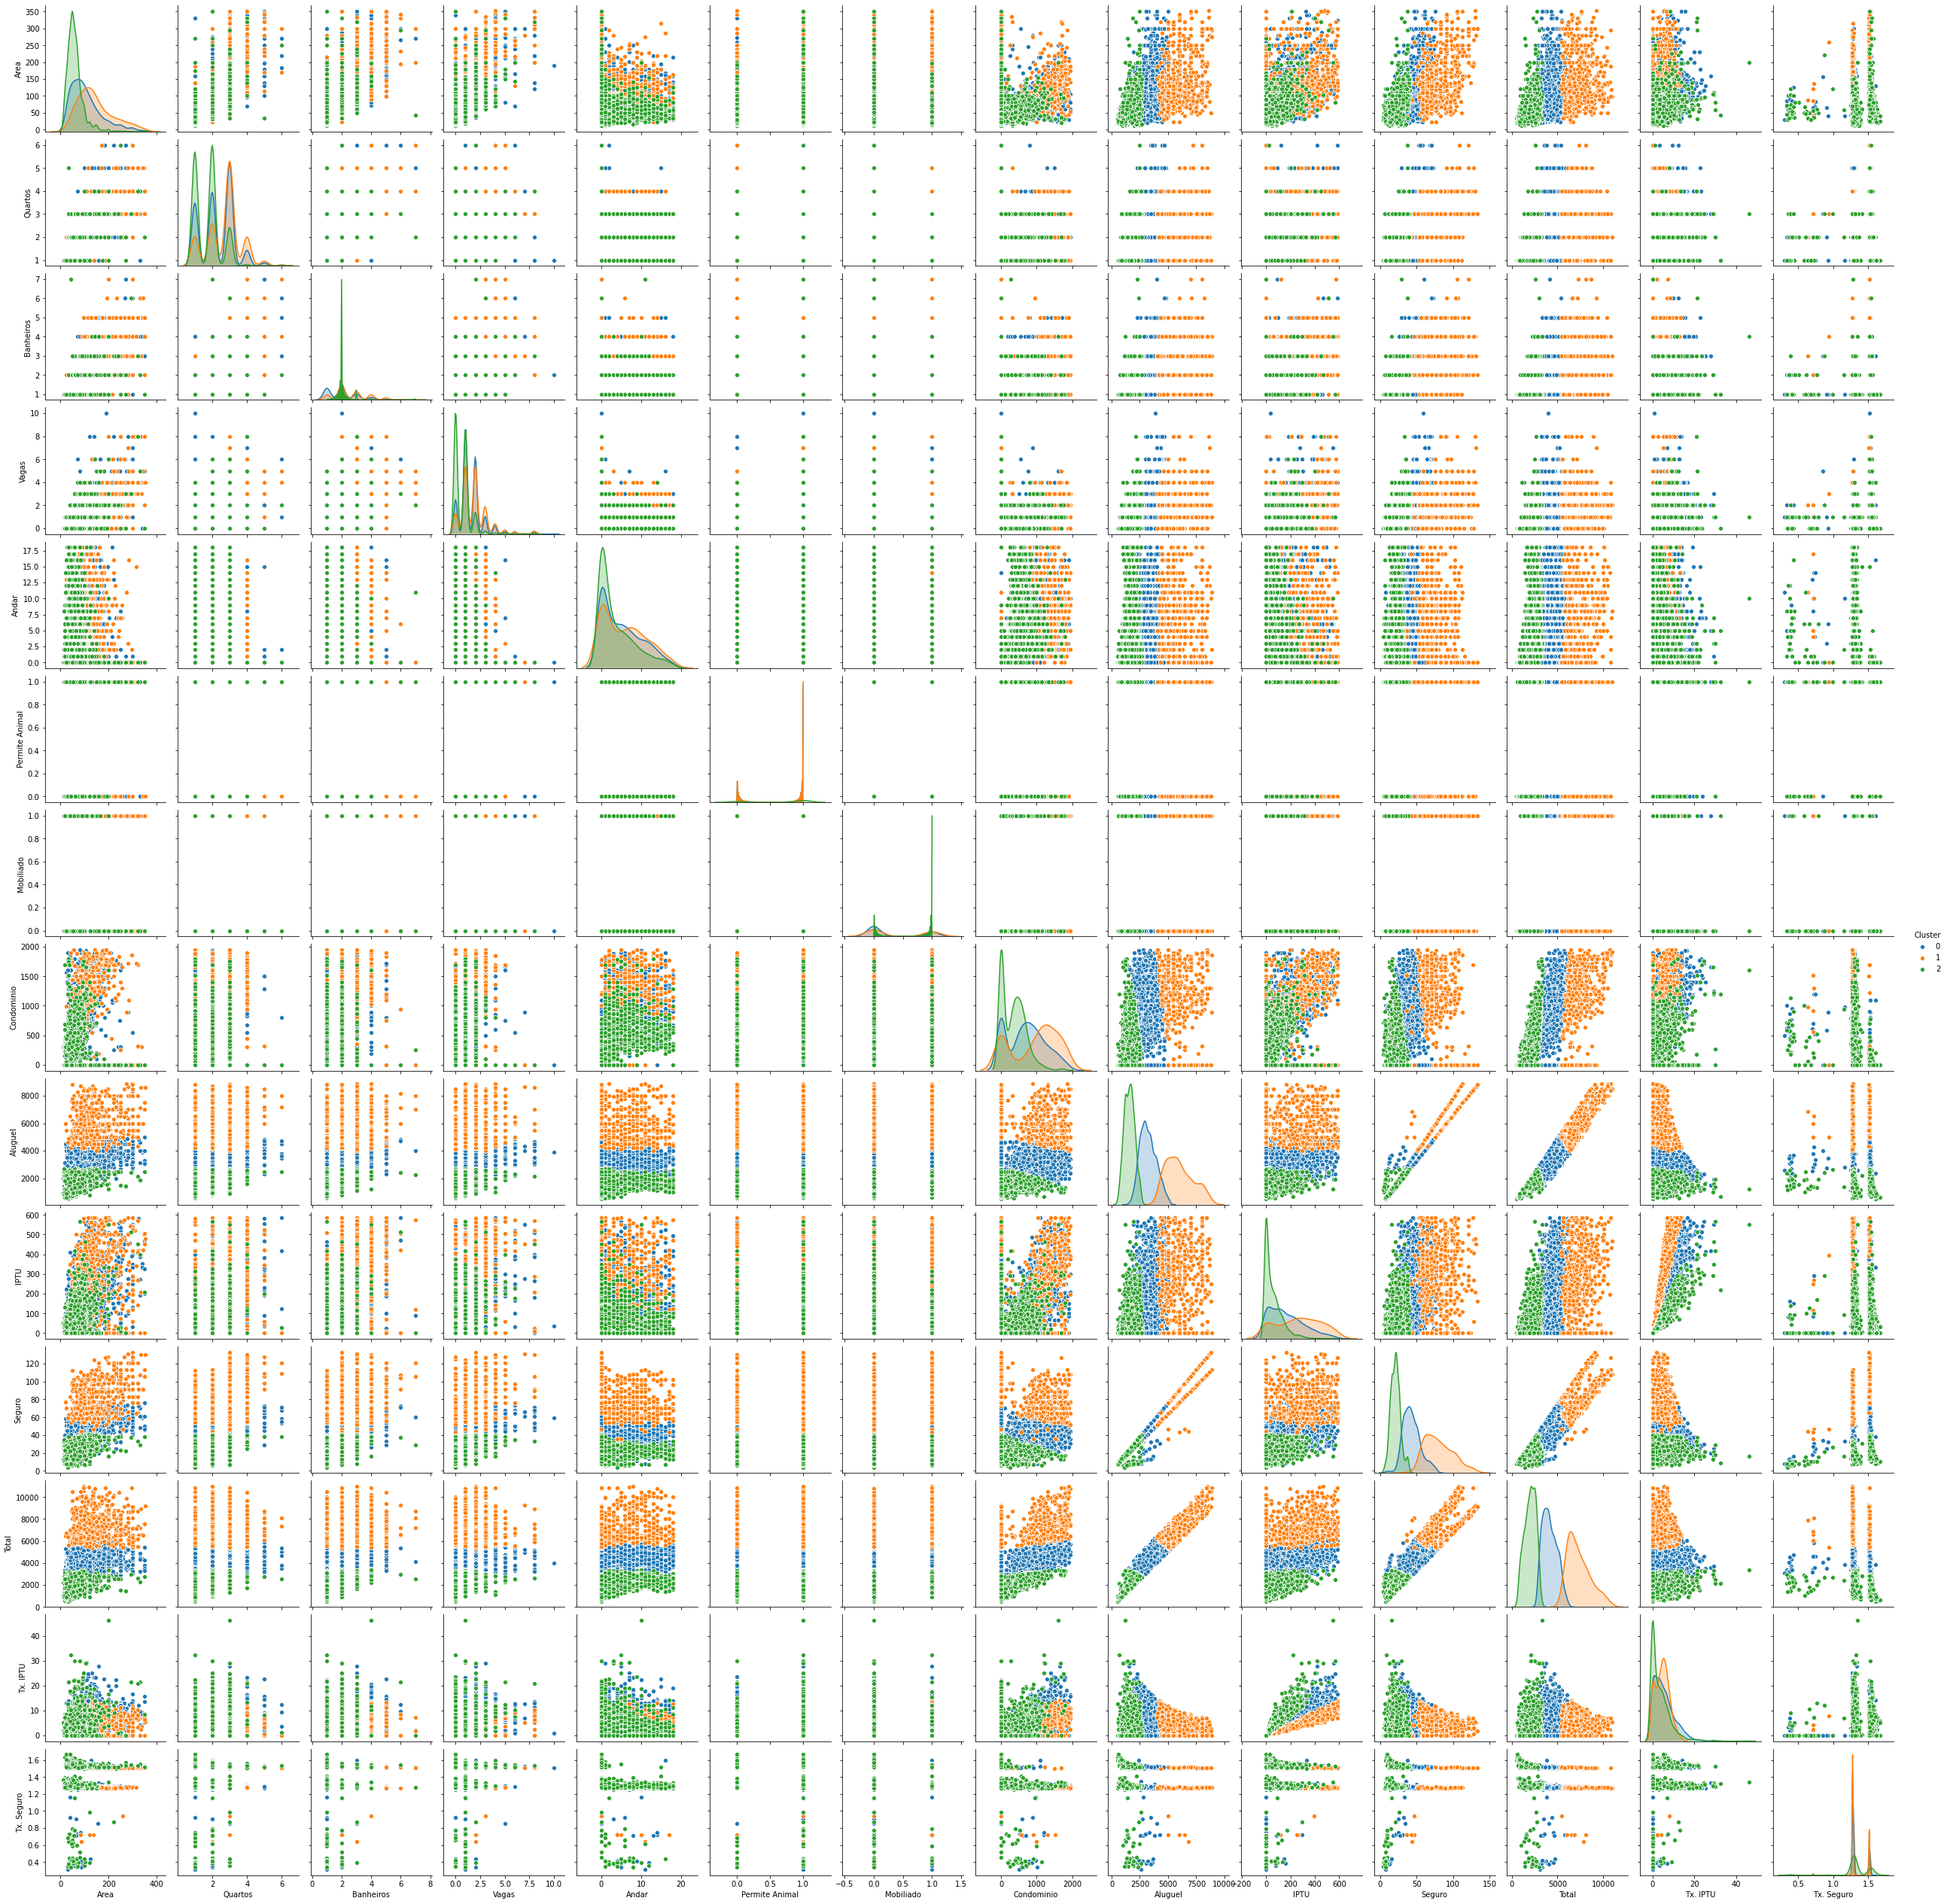

In [ ]:
sns.pairplot(rent[rent.Cidade == "São Paulo"], hue="Cluster") 
plt.show()